### Instructor  : Dr Ong Sim Ying
### Name         : Aswadi Abdul Rahman
### Matric No  : WQD180082



# Exercise Week 4

## 1. Why the "+"? 

The "+" is referring to armijo condition

## 2. Identify ONE technique / method (not in lecture) to perform step length calculation. 

The other technique to perform step length would be momentum update. It calculate the force on the particle related to the gradient of potential energy (i.e $F=-\nabla U$). The parameter vector with $v = mu * v - learningRate*dx$ build up velocity in any direction that has consistent gradient.

## 3. Identify ONE technique / method (not in lecture) to perform direction searching. 

The other technique to perform direction searching would be steepest descent method. The steepest descent method is a line search method that moves along $pk = ∇fk$ at every step. It can choose the step length αk in a variety of ways. One advantage of the steepest descent direction is that it requires calculation of the gradient $∇fk$ but not of second derivatives. However, it can be excruciatingly slow on difficult problems.


## 4. Show the output for your run(on Armijo Conditions and Wolfe Conditions)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

In [4]:
# the objective function
def func(x):
    return 100*np.square (np.square(x[0])-x[1])+np.square(x[0]-1)
                                                       
# first order derivatives of the function
def dfunc(x):
    df1 = 400*x[0]*(np.square(x[0])-x[1])+2*(x[0]-1)
    df2 = 200*(np.square(x[0])-x[1])
    return np.array([df1, df2])

In [43]:
# the armijo algorithm
def armijo (valf, grad, niters):
    #beta random.random()
    #sigma random. uniform(0, .5)
    beta= 0.25
    sigma= 0.25
    (miter, iter_conv) =(0, 0)
    conval = [0,0]
    val = []
    objectf = []
    val.append(valf)
    objectf.append (func(valf))
    while miter <niters:
        leftf = func(valf+np.power(beta, miter)*grad)
        rightf = func(valf) + sigma *np.power(beta, miter)*dfunc(valf).dot(grad)
        if leftf-rightf <-0:
            iter_conv = miter
            conval = valf+np.power(beta, iter_conv)*grad
            break
        miter +=1
        val.append (conval)
        objectf.append (func (conval))
        print(val[miter],objectf[miter])
    return conval, func (conval), iter_conv, val, objectf

[0, 0] 1
[0, 0] 1
[0, 0] 1
The value, minimal and number of iterations are [-0.284375  0.06875 ], 1.6643064975738526, 3


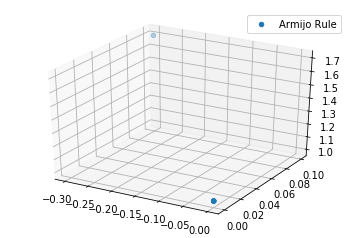

In [44]:
# using armijo
start = np.array([-.3, .1],)
direction = np.array ([1, -2])
maximum_iterations = 30

converge_value, minimal, no_iter, val, objf = armijo(start, direction, maximum_iterations)
print("The value, minimal and number of iterations are " + str(converge_value) + ", " + str(minimal)+ ", " + str(no_iter))
x = np.array([i[0] for i in val])
y = np.array([i[1] for i in val])
z = np.array (objf)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='Armijo Rule')
ax.legend()
plt.savefig('armijo.jpg')

In [41]:
def wolfe(valf, direction, max_iter):
    (alpha, beta, step, c1, c2) = (0, 1000, 5.0, 0.15, 0.3)
    i = 0
    stop_iter = 0
    stop_val = valf
    minima = 0
    val = []
    objectf = []
    val.append (valf)
    objectf.append (func(valf))
    while i <= max_iter:
        # first confition
        leftf = func(valf + step*direction)
        rightf = func(valf) + step*c1*dfunc(valf).dot(direction)
        if leftf > rightf:
            beta = step
            step = .5*(alpha + beta)
            val.append (valf+step*direction)
            objectf.append(leftf)
        elif dfunc (valf + step*direction).dot(direction) < c2*dfunc(valf).dot(direction):
            alpha = step
            if beta > 100:
                step = 2*alpha
            else:
                step = .5*(alpha + beta)
            val.append (valf+step*direction)
            objectf.append(leftf)
        else:
            val.append (valf+step*direction)
            objectf.append(leftf)
            break
        i+= 1
        stop_val = valf + step*direction
        stop_iter = i
        minima = func(stop_val)
        print(val[i],objectf[i])
    return stop_val, minima, stop_iter, step, val, objectf

[-0.15 -0.5 ] 537.22
[0.225 0.   ] 28.623124999999995
[ 0.0375 -0.25  ] 0.8569140625
[-0.05625 -0.375  ] 7.246916503906251
[-0.009375 -0.3125  ] 15.416469879150393
[ 0.0140625 -0.28125  ] 10.789956827163694
[ 0.02578125 -0.265625  ] 8.893356571793555
[ 0.01992187 -0.2734375 ] 8.040121159590782
[ 0.02285156 -0.26953125] 8.459079958538057
[ 0.02138672 -0.27148438] 8.247705325603166
[ 0.02211914 -0.27050781] 8.352916403945864
[ 0.02175293 -0.27099609] 8.300192109394914
[ 0.02156982 -0.27124023] 8.326524529833518
[ 0.02147827 -0.2713623 ] 8.339713030429117
[ 0.02152405 -0.27130127] 8.34631285747828
[ 0.02150116 -0.27133179] 8.34301247910066
[ 0.0215126  -0.27131653] 8.344662552066927
[ 0.02150688 -0.27132416] 8.34383748652932
[ 0.02150402 -0.27132797] 8.34425001203436
[ 0.02150259 -0.27132988] 8.344456280234686
[ 0.02150187 -0.27133083] 8.344559415696814
[ 0.02150152 -0.27133131] 8.344610983768375
[ 0.02150134 -0.27133155] 8.344636767889275
[ 0.02150143 -0.27133143] 8.34464965997101
[ 0.02

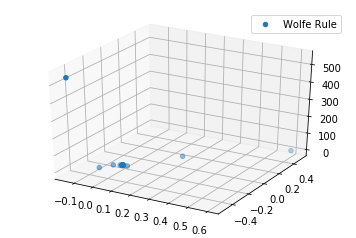

In [42]:
# using wolfe
start = np.array([.6, .5])
dirn = np.array([-.3, -.4])

converge_value, minimal, no_iter, size, val, objectf = wolfe(start, dirn, 30)
print("The value, minimal and iterations needed are " + str(converge_value) +", " +str(minimal) + ", " + str(no_iter) + ", "+ str(size))
x = np.array ([i[0] for i in val])
y = np.array ([i[1] for i in val])
z = np.array (objectf)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='Wolfe Rule')
ax.legend()
plt.savefig('wolfe.jpg')

## 5. Explain the practical steps in Armijo function using words. 

1. First the function initiate some of the variables: beta (step length) = 0.25, sigma (c1) =0.25, miter and iter_conv = 0 , conval = empty list with [0,0], val=empty list, objetf=empty list, val = append of the output for valf, object = append of the function(valf).
2. Next the while loops. While the miter is less than niters (defined by user, which is maximum_iterations = 30), the function calculate the left hand side of the Armijo condition f(X_k+ap_k) with the initial input of valf = ([-0.3,0.1]) and grad = ([1,-0.2])
3. The right hand function (x_k )+c_1 a∇f_k^T p_k , sigma (c1) =0.25, a = 〖beta〗^miter,∇f_k^T=dfunc(valf), p_k=grad (dot(grad) is because dfunc(valf) will return an array).
4. If the value of leftf is less than or equal to rightf, the miter will be equal to iter, conval will be equal to valf plus 〖beta〗^(iter_conv) multiple by grad and the condition break.
5. If the value of leftf is greater than rightf, then then value to miter will increase by 1 conval value will be append to val, the output of func(conval) will be append to object.
6. Until the miter is greater than niters, the Armijo function stop, and return all the values.


## 6. Explain the practical steps in Wolfe function using words. 

1. First initialize the value for alpha, beta, step, c1, c2, i, stop_iter, minima.
2. Next the while loop, while i less than or equal to max_iter (set by user =30), the leftf and rightf are calculated based on f(X_k+ap_k) and f(x_k )+c_1 a∇f_k^T p_k  
3. In the if-else condition, if leftf is greater than rightf, step assign to beta and the step is calculated next with 0.5 (alpha plus beta, the first iteration will be 0.5(0+5). The value of valf plus step multiple by direction will be append to val. The output of leftf will be append to object.
4. The next elif condition, 〖∇f(x_k+a_k p_k)〗^T p_k is less than c_2 ∇f_k^T p_k, step assign to beta. Another sub if-else condition use to calculate the step value, if beta more than 100 then step=2*alpha, else step=0.5*(alpha+beta). The value of valf plus step multiple direction is append to val and the output of leftf is append to object.
5. The else condition, is when both the Armijo and Curvature condition meet, then the valf plus step multiple direction will be append to val and the output of leftf will append to object. And break.
6. i will be increased by 1. The stop_val equal to the valf plus step multiple by direction. The i assign to stop_iter. The minima will be the output of the func(stop_val).
7. Until i is more than max_iter, the wolfe function will return the values.


## 7. What is your observation for the results generated using Armijo conditions and wolfe conditions? Discuss.

The armijo rule achieve minimal when it run until iteration 3, which the objective function value return 1.66. The wolfe rule achieve minimal when it run until iteration 2 with the objective function value equals to 0.856.